In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("C:\\Users\\clint.isaacs\\Data Science 2023\\Integrated Project\\insurance_claims_raw.xlsx")

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

### Missing Values

In [5]:
null_counts = df.isnull().sum()
null_counts

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           93
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

### Binding Numeric Data

In [9]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.964000,546238.648000,2002-02-08 04:40:47.999999872,1133.500000,1257.272480,1.102000e+06,501214.488000,25178.866000,-26793.700000,2015-01-30 08:02:24,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
min,0.000000,19.000000,100804.000000,1990-01-08 00:00:00,500.000000,433.330000,0.000000e+00,430104.000000,0.000000,-111100.000000,2015-01-01 00:00:00,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,1995-09-19 00:00:00,500.000000,1090.567500,0.000000e+00,448404.500000,0.000000,-51500.000000,2015-01-15 00:00:00,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,2002-04-01 12:00:00,1000.000000,1258.425000,0.000000e+00,466445.500000,0.000000,-23250.000000,2015-01-31 00:00:00,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2008-04-21 12:00:00,2000.000000,1415.825000,0.000000e+00,603251.000000,51025.000000,0.000000,2015-02-15 00:00:00,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2015-02-22 00:00:00,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,2015-03-01 00:00:00,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000
std,115.113174,9.126555,257063.005276,NaN,610.983675,244.044082,2.296709e+06,71701.610941,27849.517421,28104.096686,NaN,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861


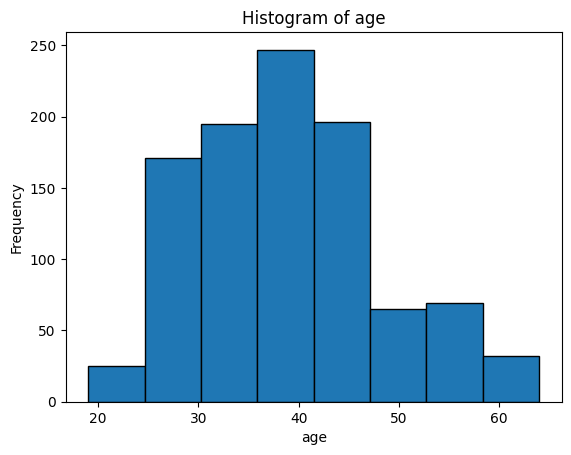

In [13]:
# Choose the column for the histogram
column_name = 'age'

# Plot the histogram
plt.hist(df[column_name], bins=8, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

In [15]:
bin_edges = [0, 30, 55, 100]  # Define the bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df['ages_category'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels)

In [16]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,Middle Aged
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,Middle Aged
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,Young Adult
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,Middle Aged


In [18]:
bin_edges_customer = [0, 25, 150, 500]  # Define the bin edges
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df['customer_category'] = pd.cut(df['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

In [19]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,6500,1300,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client


In [60]:
df["Contract Years"] = (df["months_as_customer"]/12).astype(int)

In [61]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer,age_category,claim_amount_per_vehicle,incident_day_of_week
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2004,Y,Middle Aged,Long-Term Client,27,38455.540000,-33154.460000,6,71610.0,Sunday
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,2007,Y,Middle Aged,Long-Term Client,19,22747.180000,17677.180000,5,5070.0,Wednesday
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,2007,N,Young Adult,Established Client,11,15780.063333,-18869.936667,2,11550.0,Sunday
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2014,Y,Middle Aged,Long-Term Client,21,30202.453333,-33197.546667,5,63400.0,Saturday
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,2009,N,Middle Aged,Long-Term Client,19,30094.290000,23594.290000,5,6500.0,Tuesday


In [22]:
df['total_premiums_paid'] = (df['policy_annual_premium']/12) * df['months_as_customer']

In [23]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000


In [25]:
df['net_value_of_customer'] = df['total_premiums_paid'] - df['total_claim_amount']

In [26]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000


In [28]:
bins = [0, 25, 30, 35, 40, 45, 50, 55, float('inf')]
labels = [1,2,3,4,5,6,7, 8]

df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer,age_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000,6
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000,5
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667,2
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667,5
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000,5


In [29]:
# Claim Amount per vehicle
df['claim_amount_per_vehicle'] = df['total_claim_amount'] / df['number_of_vehicles_involved']


In [37]:
#Claim freq by zip code
claim_frequency_by_city = df.groupby('incident_city')['policy_number'].count()

In [39]:
claim_frequency_by_city

incident_city
Arlington      152
Columbus       149
Hillsdale      141
Northbend      145
Northbrook     122
Riverwood      134
Springfield    157
Name: policy_number, dtype: int64

In [44]:
claim_amount_by_state = df.groupby('incident_state')['total_claim_amount'].sum()

In [45]:
claim_amount_by_state

incident_state
IL      114920
NC     5421230
NY    14773770
OH     1225790
PA     1487150
SC    13423230
VA     5499770
WV    10816080
Name: total_claim_amount, dtype: int64

In [46]:
#incident day of week
df['incident_day_of_week'] = df['incident_date'].dt.day_name()

In [48]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer,age_category,claim_amount_per_vehicle,time_to_report,claim_frequency_by_zip,incident_day_of_week
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000,6,71610.0,0,1,Sunday
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000,5,5070.0,0,1,Wednesday
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,Young Adult,Established Client,11.166667,15780.063333,-18869.936667,2,11550.0,0,1,Sunday
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667,5,63400.0,0,1,Saturday
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000,5,6500.0,0,1,Tuesday


In [52]:
claim_amount_by_weekday = df.groupby('incident_day_of_week')['total_claim_amount'].mean()

In [53]:
claim_amount_by_weekday

incident_day_of_week
Friday       53917.112676
Monday       53129.926471
Saturday     54039.638554
Sunday       54862.424242
Thursday     48978.958333
Tuesday      50269.259259
Wednesday    53988.275862
Name: total_claim_amount, dtype: float64

In [57]:
df = df.drop(columns = ('claim_frequency_by_zip', 'time_to_report'), axis = 1)

In [58]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer,age_category,claim_amount_per_vehicle,incident_day_of_week
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000,6,71610.0,Sunday
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000,5,5070.0,Wednesday
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667,2,11550.0,Sunday
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667,5,63400.0,Saturday
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000,5,6500.0,Tuesday


In [67]:
df['incident_hour_of_the_day'].value_counts().astype(int).sort_index(ascending = True)

incident_hour_of_the_day
0     52
1     29
2     31
3     53
4     46
5     33
6     44
7     40
8     36
9     43
10    46
11    30
12    40
13    46
14    43
15    39
16    49
17    54
18    41
19    40
20    34
21    42
22    38
23    51
Name: count, dtype: int32

In [68]:
hourly_brackets = {
    (0, 2): 'Midnight',
    (3, 6): 'Early Morning',
    (6, 9): 'Morning',
    (10, 12): 'Late Morning',
    (13, 15): 'Afternoon',
    (16, 18): 'Evening',
    (19, 21): 'Night',
    (22, 23): 'Late Night'
}

df['hourly_bracket'] = pd.cut(df['incident_hour_of_the_day'], bins=[0, 3, 6, 10, 13, 16, 19, 22, 24], include_lowest=True, labels=[hourly_brackets[key] for key in hourly_brackets])

In [69]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer,age_category,claim_amount_per_vehicle,incident_day_of_week,hourly_bracket
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,Y,Middle Aged,Long-Term Client,27,38455.540000,-33154.460000,6,71610.0,Sunday,Early Morning
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Y,Middle Aged,Long-Term Client,19,22747.180000,17677.180000,5,5070.0,Wednesday,Morning
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,N,Young Adult,Established Client,11,15780.063333,-18869.936667,2,11550.0,Sunday,Morning
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,Y,Middle Aged,Long-Term Client,21,30202.453333,-33197.546667,5,63400.0,Saturday,Early Morning
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,N,Middle Aged,Long-Term Client,19,30094.290000,23594.290000,5,6500.0,Tuesday,Night


In [70]:
df.to_csv('C:\\Users\\clint.isaacs\\Data Science 2023\\Integrated Project\\Advanced_Features_Claims_Data.csv')